In [1]:
%matplotlib notebook

In [2]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import goofit as gf

In [3]:
m12 = gf.Observable('m12', .9, 2.)
m13 = gf.Observable('m13', .9, 2.)
evn = gf.EventNumber("evn")

In [4]:
di = gf.DecayInfo3()

In [5]:
di.motherMass = 1.86962
di.daug1Mass = .493677
di.daug2Mass = .493677
di.daug3Mass = .493677
di.meson_radius = 1.5

In [6]:
ar1 = gf.Variable("ar1", 1)
ai1 = gf.Variable("ai1", 0)
mass1 = gf.Variable("mass1", 1.2)
width1 = gf.Variable("width1", .1)
res1 = gf.Resonances.RBW("simple1", ar1, ai1, mass1, width1, 0, gf.PAIR_12)
di.add_resonance(res1)

In [7]:
ar2 = gf.Variable("ar2", 1)
ai2 = gf.Variable("ai2", 0)
mass2 = gf.Variable("mass2", 1.2)
width2 = gf.Variable("width2", .1)
res2 = gf.Resonances.RBW("simple2", ar2, ai2, mass2, width2, 0, gf.PAIR_13)
di.add_resonance(res2)

In [8]:
constant0 = gf.Variable('constant0', 0)
constant1 = gf.Variable('constant1', 1)
eff = gf.PolynomialPdf('eff', [m12, m13], [constant1], [constant0,constant0], 0)

In [9]:
dp = gf.Amp3Body("dp", m12, m13, evn, di, eff)
prod = gf.ProdPdf("prod", [dp])

In [11]:
dplt = gf.DalitzPlotter(prod, dp)
ext = dplt.getExtent()
arr = dplt.make2D()

In [23]:
r_pi = (0, np.pi)
r_mass = (1,1.4,.02)
r_width = (.02,.2,.01)

<IPython.core.display.Javascript object>


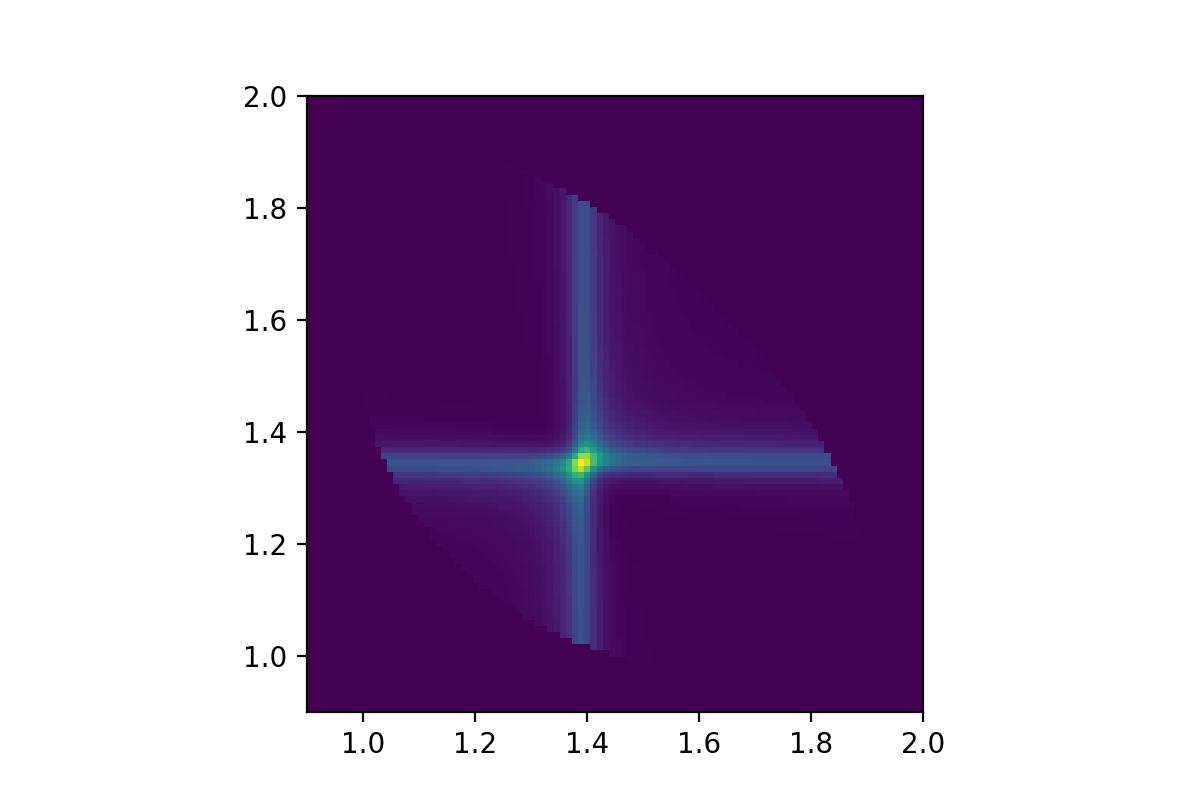

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
v = ax.imshow(arr, extent=ext, origin='lower')

In [26]:
@interact
def f(aɸ=r_pi, bɸ=r_pi, m1=r_mass, w1=r_width, m2=r_mass, w2=r_width):
    ar1.value, ai1.value = np.cos(aɸ), np.sin(aɸ)
    ar2.value, ai2.value = np.cos(bɸ), np.sin(bɸ)
    mass1.value, width1.value = m1, w1
    mass2.value, width2.value = m2, w2
    dplt = gf.DalitzPlotter(prod, dp)
    arr = dplt.make2D()
    ax.clear()
    v = ax.imshow(arr, extent=ext, origin='lower')

interactive(children=(FloatSlider(value=1.5707963267948966, description='aɸ', max=3.141592653589793), FloatSlider(value=1.5707963267948966, description='bɸ', max=3.141592653589793), FloatSlider(value=1.18, description='m1', max=1.4, min=1.0, step=0.02), FloatSlider(value=0.11, description='w1', max=0.2, min=0.02, step=0.01), FloatSlider(value=1.18, description='m2', max=1.4, min=1.0, step=0.02), FloatSlider(value=0.11, description='w2', max=0.2, min=0.02, step=0.01), Output()), _dom_classes=('widget-interact',))